In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

In [2]:
# 读取数据
x,y = load_svmlight_file("/Users/limuyi/Desktop/lab1.txt")

In [3]:
# 划分训练集和验证集
xtrain,xtest,ytrain,ytest = train_test_split(
        x,y,test_size = 0.3, random_state = 0)

In [4]:
#from sklearn.metrics import roc_auc_score
class gradientRegression(object):
    # 定义输入计算函数
    def operateInput(model,x):
        return x.dot(model.w[1:]) + model.w[0]
    # 定义训练函数
    def operate(model, x, y):
        # 初始化      
        rate = 0.001
        iters = 100
        model.rate = rate  # 学习率
        model.iters = iters  # 迭代次数
        model.w = np.zeros(1 + x.shape[1]) # 权重
        model.losses = [] # 每次迭代的损失函数值 
        model.pred = []   # 预测结果
        #model.auc = []
        
        #model.predauc = 0 # 准确率评估
        # 更新权重
        for i in range(model.iters):
            output = model.operateInput(x)       
            model.pred.append(output)
            m=x.shape[0]
            diff = y - output       
            model.w[1:] += model.rate * (x.T.dot(diff))
            model.w[0] += model.rate * (diff.sum())
            loss = (diff ** 2).sum() / (2.0)
            model.losses.append(loss)
            #model.auc.append(roc_auc_score(y,model.pred))

        return model



In [5]:
model = gradientRegression()


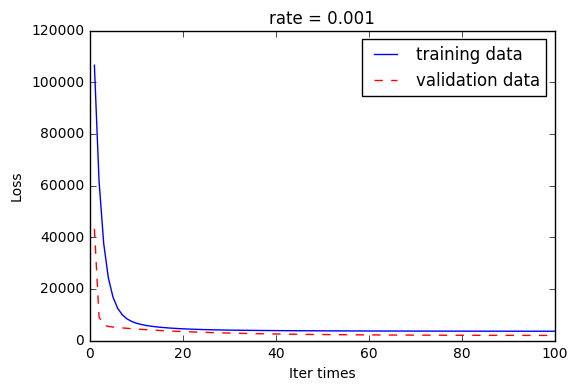

In [6]:
# 预测
model.operate(xtrain,ytrain)

xline = range(1,model.iters+1)
plt.plot(xline,model.losses,label='training data')
plt.xlabel("Iter times")
plt.ylabel("Loss")
plt.title("rate = 0.001")

model.operate(xtest,ytest)
plt.plot(xline,model.losses,'r--',label = 'validation data')
plt.legend(loc='upper right')

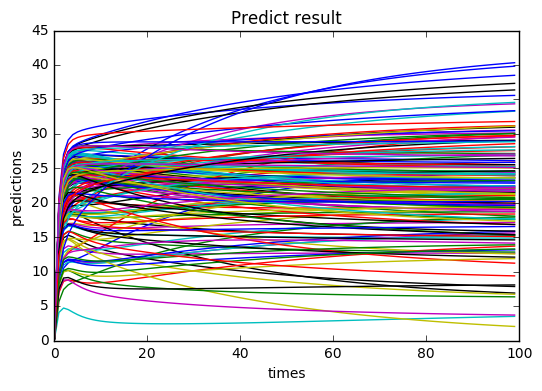

In [7]:
# 预测结果显示
plt.plot(range(0,len(model.pred)),model.pred)
plt.xlabel("times")
plt.ylabel("predictions")
plt.title("Predict result")